In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (10,10)

In [39]:
path_dataset = "../../Datasets/MICRODADOS_ENEM_2019_SAOPAULO_FILTERED.parquet"
df = pd.read_parquet(path_dataset)

In [40]:
df.rename(columns={"NU_NOTA_CN":"CN", "NU_NOTA_CH":"CH", "NU_NOTA_LC":"LC", "NU_NOTA_MT":"MT"}, inplace=True)
columns= ["CN","MT","CH", "LC"]

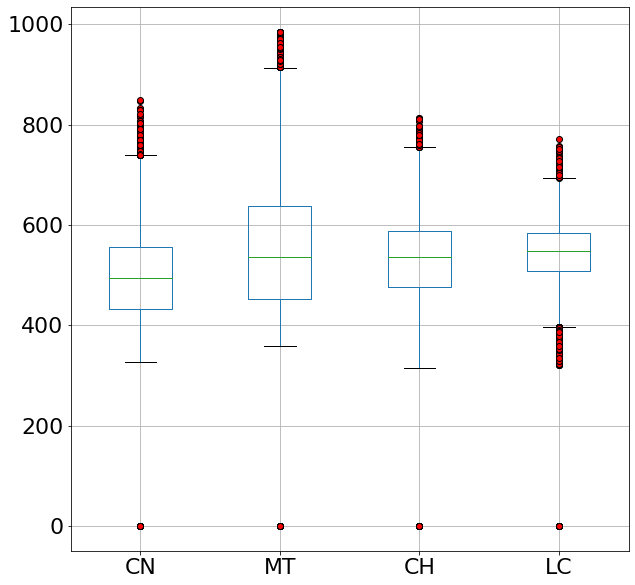

In [71]:
red_circle = dict(markerfacecolor='red', marker='o')
df.boxplot(column=columns, flierprops=red_circle, )
plt.savefig("../../Outputs/Medidas descritivas/boxplot_notas_sp.png")

In [91]:
dfNotas = df[columns].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.90])
medianRow = pd.DataFrame([df[['CN', 'MT', 'CH','LC']].median().values], index=["median"], columns=columns)
dfNotas = pd.concat([dfNotas.iloc[:2], medianRow, dfNotas.iloc[2:]]).round(2)

dfNotas.to_excel("../../Outputs/Medidas descritivas/description_notas_sp.xlsx")
dfNotas

,CN,MT,CH,LC
count,163189.00,163189.00,173812.00,173812.00
mean,496.88,551.97,531.43,542.31
median,493.70,536.90,537.30,548.80
std,80.91,118.62,82.79,60.49
min,0.00,0.00,0.00,0.00
10%,393.00,407.60,420.60,465.90
25%,433.10,452.90,476.90,509.00
50%,493.70,536.90,537.30,548.80
75%,555.70,637.40,588.50,583.30
90%,602.30,718.00,632.70,611.20


In [81]:
qtdCandidatos = df.shape[0]
qtdAusentes = df[(df["TP_PRESENCA_CN"]==0) & (df["TP_PRESENCA_CH"]==0) & (df["TP_PRESENCA_LC"]==0) & (df["TP_PRESENCA_MT"]==0)].shape[0]
qtdFaltou =  df[(df["TP_PRESENCA_CN"]==0) | (df["TP_PRESENCA_CH"]==0) | (df["TP_PRESENCA_LC"]==0) | (df["TP_PRESENCA_MT"]==0)].shape[0]
qtdFaltEliminados = df[(df["TP_PRESENCA_CN"]!=1) | (df["TP_PRESENCA_CH"]!=1) | (df["TP_PRESENCA_LC"]!=1) | (df["TP_PRESENCA_MT"]!=1)].shape[0]

print(f'Quantidade total de candidatos: {qtdCandidatos}')
print(f'Quantidade de candidatos que não compareceram em todas as provas: {qtdAusentes} ({round(qtdAusentes*100/qtdCandidatos, 2)}%)')
print(f'Quantidade de candidatos que não compareceram em uma das provas: {qtdFaltou} ({round(qtdFaltou*100/qtdCandidatos,2)}%)')
print(f'Quantidade de candidatos que não compareceram ou foram eliminados em uma das provas: {qtdFaltEliminados} ({round(qtdFaltEliminados*100/qtdCandidatos,2)}%)')

Quantidade total de candidatos: 229837
Quantidade de candidatos que faltaram em todas as provas: 55340 (24.08%)
Quantidade de candidatos que faltaram em uma das provas: 67047 (29.17%)
Quantidade de candidatos que faltaram ou foram eliminados em uma das provas: 67178 (29.23%)
